#Exploratory Data Analysis

Import necessary libraries such as pandas, numpy and matplot to read csv file and plot results

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read Fraud.csv file

In [ ]:
df=pd.read_csv("/content/Fraud.csv")
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0.0,0.0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0.0,0.0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0.0,0.0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0.0,0.0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0.0,0.0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0.0,0.0


Check for type of variables using info() method

In [ ]:
#check datatypes present in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2048519 entries, 0 to 2048518
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         float64
 10  isFlaggedFraud  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 171.9+ MB


Statistical summary of dataset (mean,standard deviation, quartiles)

In [ ]:
# get statistical values
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,2.048519e+06,2.048519e+06,2.048519e+06,2.048519e+06,2.048518e+06,2.048518e+06,2.048518e+06,2048518.0
mean,8.709984e+01,1.615621e+05,8.547007e+05,8.760121e+05,9.967558e+05,1.114912e+06,1.000723e-03,0.0
std,6.369289e+01,2.713924e+05,2.921868e+06,2.958113e+06,2.304549e+06,2.399053e+06,3.161839e-02,0.0
min,1.000000e+00,6.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,2.000000e+01,1.308307e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,4.800000e+01,7.831338e+04,1.494100e+04,0.000000e+00,1.377113e+05,2.281467e+05,0.000000e+00,0.0
75%,1.540000e+02,2.167590e+05,1.200311e+05,1.615194e+05,9.484869e+05,1.151617e+06,0.000000e+00,0.0
max,1.810000e+02,1.000000e+07,3.893942e+07,3.894623e+07,4.220740e+07,4.228378e+07,1.000000e+00,0.0


Check for presence of null/missing values, True shows null values are present in dataset

In [ ]:
# check entire dataframe for any Null/missing values present
df.isnull().values.any()

True

Count total null values in dataframe

In [ ]:
# count all NaN on entire dataframe
count_nan = df.isnull().sum().sum()
count_nan

4

Replace null/missing values with 0

In [ ]:
# replace Nan values with 0
df1=df.replace(np.nan,0)

#check for NaN values
df1.isnull().values.any()

False

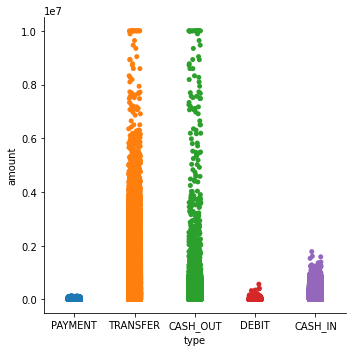

In [ ]:
sns.catplot(x="type", y="amount",data=df1)

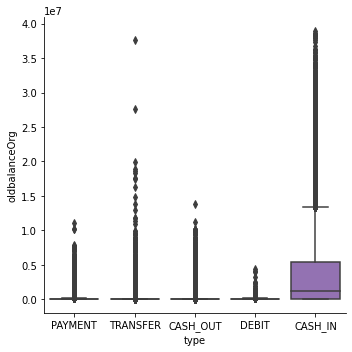

In [ ]:
sns.catplot(x="type", y="oldbalanceOrg", kind="box", data=df1)

Count total fraud cases as per isFraud column in dataframe

In [ ]:
# counting totL FRAUDS occurred (1 in the isFraud column depicts fraud occurrence)
df1['isFraud'].values.sum()

2044.0

Check for duplicate rows and remove them if any

In [ ]:
# this shows duplicate rows in our dataset
df1.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
2048514    False
2048515    False
2048516    False
2048517    False
2048518    False
Length: 2048519, dtype: bool

There are no duplicate rows in our dataset.

Dropping categorical variables from the dataset which would not be used for further analysis of data

In [ ]:
df1=df1.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1)
df1.head(5)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0.0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0.0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1.0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1.0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0.0


Plotting box plot for dependent and independent variables

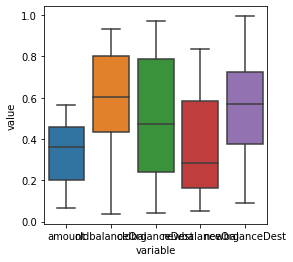

In [ ]:
import seaborn as sns

df = pd.DataFrame(data = np.random.random(size=(10,5)), columns = ['amount','oldbalanceOrg','oldbalanceDest','newbalanceOrg','newbalanceDest'])

sns.boxplot(x="variable", y="value", data=pd.melt(df))

A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be "outliers" using a method that is a function of the inter-quartile range.

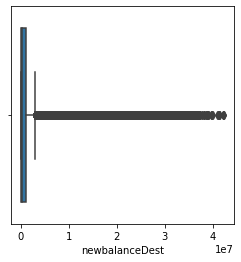

In [ ]:
# Removing outliers 
import seaborn as sns

# plotting boxplot to visualize outliers
sns.boxplot(x=df1['newbalanceDest'])


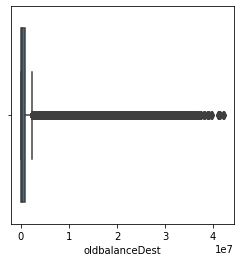

In [ ]:
sns.boxplot(x=df1['oldbalanceDest'])

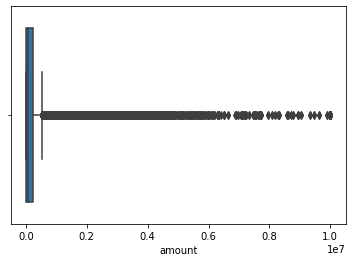

In [ ]:
sns.boxplot(x=df1['amount'])

The above plots show high skewness in the data points.

The data points lying to the extreme side of right whisker are the outliers in the newbalanceDest column. In this case the points near to the right whisker vicinity is considered and those lying away will be dropped.

# Feature Engineering

#Remove outliers

In [ ]:
df1.shape

(2035021, 8)

Calculating the first quartile, third quartile and Inter-quartile range 

In [ ]:
q1=df1['newbalanceDest'].quantile(.25)
q3=df1['newbalanceDest'].quantile(.75)
IQR=q3-q1

new_boundary=q3+3*IQR

Removing outliers from all the independent variables columns

In [ ]:
df1[(df1['newbalanceDest']<q3) & (df1['newbalanceDest'])>q1] 

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
9,1,DEBIT,5337.77,41720.0,36382.23,41898.00,40348.79,0.0
10,1,DEBIT,9644.94,4465.0,0.00,10845.00,157982.12,0.0
15,1,CASH_OUT,229133.94,15325.0,0.00,5083.00,51513.44,0.0
21,1,DEBIT,9302.79,11299.0,1996.21,29832.00,16896.70,0.0
41,1,DEBIT,5758.59,32604.0,26845.41,209699.00,16997.22,0.0
...,...,...,...,...,...,...,...,...
2048509,181,CASH_OUT,110644.85,63554.0,0.00,0.00,110644.85,0.0
2048510,181,CASH_OUT,5653.42,21249.0,15595.58,0.00,5653.42,0.0
2048512,181,CASH_OUT,79624.84,14296.0,0.00,0.00,79624.84,0.0
2048515,181,CASH_OUT,315365.20,0.0,0.00,486353.03,801718.23,0.0


newbalanceDest box plot after removal of outliers

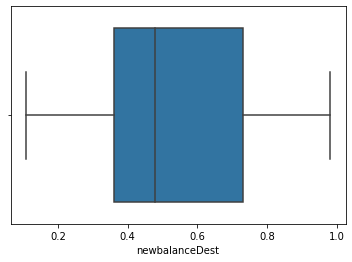

In [ ]:
sns.boxplot(x=df['newbalanceDest'])

Thus, the box-plot does not show any outliers in data after outlier removal

Removing outliers from all columns('amount','oldbalanceOrg','oldbalanceDest','newbalanceDest') in dataframe df1

Correlation plot of dependent and independent variables

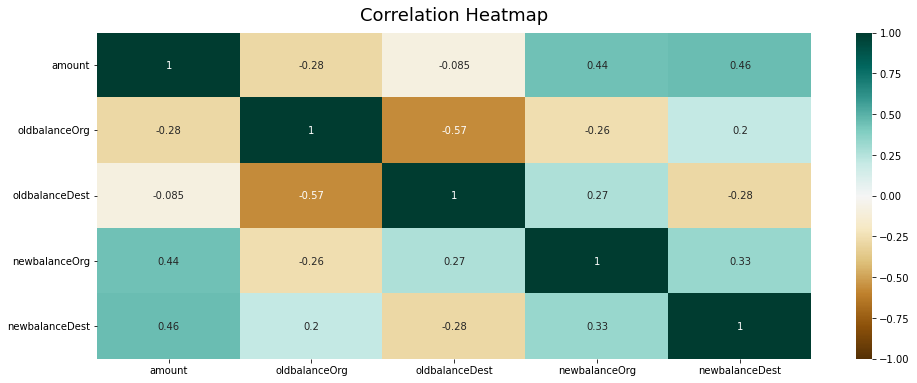

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

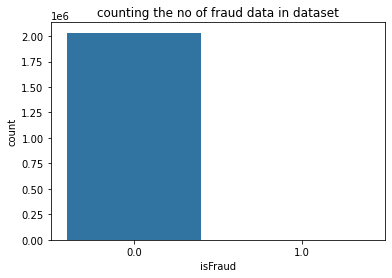

In [ ]:
import seaborn as sns
sns.countplot(x="isFraud",data=df1)
plt.title("counting the no of fraud data in dataset")
plt.rcParams['figure.figsize'] = (4,4)
plt.show()

The plot above show shows that the count of fraud transaction in the dataset is way less then total number of valid transactions. This in itself suggests the high imbalance in the dataset. In order to perform model deployment the dataset has to be balanced. It can be accomplished using upsampling.

In [ ]:
# counting shape of fraud and not_fraud dataset
fraud=df1[df1['isFraud']==1]
not_fraud=df1[df1['isFraud']==0]
print(fraud.shape, not_fraud.shape)

(2050, 8) (2046469, 8)


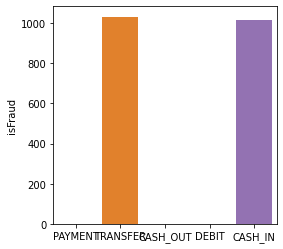

In [ ]:
sns.barplot(x=df1.type.unique(),y=df1.groupby("type")["isFraud"].sum())

Visualising the different columns of dataframe using histogram to get a measure of skewness of original balamce and final balance after transactions.

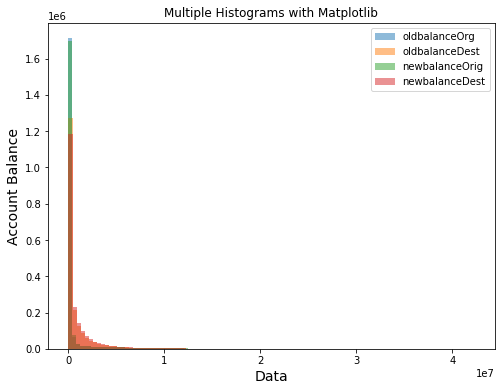

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(df1.oldbalanceOrg, bins=100, alpha=0.5, label="oldbalanceOrg")
plt.hist(df1.oldbalanceDest, bins=100, alpha=0.5, label="oldbalanceDest")
plt.hist(df1.newbalanceOrig	, bins=100, alpha=0.5, label="newbalanceOrig")
plt.hist(df1.newbalanceDest	, bins=100, alpha=0.5, label="newbalanceDest")
plt.xlabel("Data", size=14)
plt.ylabel("Account Balance", size=14)
plt.title("Multiple Histograms with Matplotlib")
plt.legend(loc='upper right')

The above plot shows the dataset is highly imbalanced and highly skewed.

Adding type of transactions as columns into dataframe using get_dummies() function of pandas library.

* 1 indicates transaction has occurred and 0 indicates no transaction has occurred.




In [ ]:
df1 = pd.get_dummies(df1,columns=["type"])
df1.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CAS,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0.0,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1.0,0,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1.0,0,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0.0,0,0,0,0,1,0


# Performing Principal Component Analysis
Now to better understand the importance of each factor we will start with PCA of our encoded dataset.

NOTE: Data should be standardized as we need to maximize the variance along the axes. And our data is measured on different scales
Let us now continue with the transformation of the data onto unit scale (mean=0 and variance=1), which is a requirement for the optimal performance of many machine learning algorithms.

In [ ]:
X = df1.drop("isFraud",1)
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
import numpy as np
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


NumPy covariance matrix: 
[[ 1.00000049e+00  6.39180749e-03 -7.54531725e-03 -6.99041923e-03
   8.08474887e-03 -1.93318825e-03  1.03329979e-03  8.35667907e-03
  -7.15762771e-04 -3.80426947e-03 -6.55374685e-03  1.01541966e-03]
 [ 6.39180749e-03  1.00000049e+00  1.58083438e-03 -3.79673494e-03
   2.15174511e-01  3.12267537e-01 -4.17329151e-04  1.82159960e-02
   6.51125757e-02 -4.70588992e-02 -3.90717648e-01  5.41873571e-01]
 [-7.54531725e-03  1.58083438e-03  1.00000049e+00  9.99033367e-01
   9.33244943e-02  6.37187648e-02 -2.05062821e-04  5.08695313e-01
  -2.04716533e-01 -2.17610614e-02 -1.87195160e-01 -8.22178919e-02]
 [-6.99041923e-03 -3.79673494e-03  9.99033367e-01  1.00000049e+00
   9.53068557e-02  6.34815243e-02 -2.07596109e-04  5.29291179e-01
  -2.14965786e-01 -2.21814069e-02 -1.91474044e-01 -8.79229781e-02]
 [ 8.08474887e-03  2.15174511e-01  9.33244943e-02  9.53068557e-02
   1.00000049e+00  9.83832122e-01 -3.03188747e-04  1.07726320e-01
   1.30432050e-01  1.20597679e-02 -3.06390987e

Next step is to get the eigen vector and values using eigen decomposition of standardized data.

In [ ]:
cor_mat1 = np.corrcoef(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-2.04787319e-03 -5.99757699e-03 -5.00785717e-03  3.09309027e-03
  -9.78604251e-03 -5.47908811e-02 -2.34865117e-01  6.65233258e-01
  -7.06454265e-01  7.26911862e-03 -5.42114103e-05  2.49675169e-16]
 [-2.44561299e-01 -3.03202779e-01 -4.13273988e-01 -7.49910654e-01
  -3.30316458e-01 -3.63953425e-02  1.38002939e-03 -4.16811153e-03
   5.24537953e-03 -6.79067835e-02 -2.18197861e-03 -6.11664456e-15]
 [-4.14673870e-01  4.05627860e-01  3.06234966e-02 -1.74211269e-03
  -6.37423479e-02 -4.06381234e-01 -1.66201178e-02 -1.73620695e-02
   1.92909104e-02  2.27080679e-02  7.01353354e-01  3.36232814e-13]
 [-4.17501166e-01  4.10525978e-01  3.11497355e-02  2.14086800e-03
  -6.01151223e-02 -3.80096659e-01 -1.59989589e-02 -1.60545473e-02
   1.78596317e-02 -2.15618207e-02 -7.11899864e-01 -3.43318155e-13]
 [-3.92612628e-01 -3.26381242e-01  1.37671479e-01  3.44788930e-02
   4.80919012e-01  1.34511217e-02 -6.14768574e-02 -3.94322926e-03
   4.94854424e-03 -6.95251490e-01  2.30276825e-02 -2.03063

In [ ]:
for ev in eig_vecs.T:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything is good!')

Everything is good!


The eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data; those are the ones can be dropped.
To do so we have ranked the eigenvalues from highest to lowest so that we can choose the top k eigenvectors.

In [ ]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.745906869828694
2.4100728166935794
1.4283896796820035
1.2271296131733318
1.0108457518281107
1.001103476638545
0.9990328525945237
0.7489612122346391
0.41835361581259906
0.009557580177835118
0.0006465313361286623
2.6911472146458978e-15


In [ ]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
var_exp

[22.882557248572468,
 20.083940139113174,
 11.903247330683369,
 10.226080109777772,
 8.423714598567594,
 8.34252897198788,
 8.325273771621037,
 6.2413434352886625,
 3.486280131771661,
 0.07964650148195936,
 0.005387761134405523,
 2.242622678871583e-14]

In [ ]:
cum_var_exp

array([ 22.88255725,  42.96649739,  54.86974472,  65.09582483,
        73.51953943,  81.8620684 ,  90.18734217,  96.42868561,
        99.91496574,  99.99461224, 100.        , 100.        ])

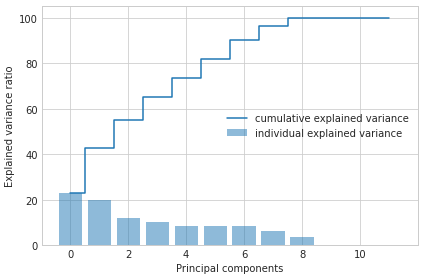

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(12), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(12), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

The plot above clearly shows that most of the variance (22.88% of the variance to be precise) can be explained by the first principal component alone. The second principal component still bears some information (20%) while the next principal components are nearly at much low level. We can drop the last principal components, so as we use 99.91% of information to train our model.

# Data Normalzation using StandardScaler 

Split dataset into dependent and independent features using train_test_split method form sklearn library. The dataset been normalized using Standard Scaler Function. 

In [ ]:
from random import seed,sample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

seed(21)
X = df1.drop("isFraud",1)
Y = df1.isFraud
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

# Standard Scaler normalization of data to adjust values between range of 0 to 1
sc=StandardScaler()
sc.fit(X_train)

# Fit train and test dataset to scaler function 
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


# Upsampling of dependent and independent variables

Upsampling of dependent and independent dataset. Upsampling is done in order to add datapoints to dataset having very low count of data in order to provide equalization in dataset such that the model does not incline towards dataset having higher number of data points. 
For this purpose SMOTE (Synthetic Minority Oversampling) has been used to upscale fraud dataset. Also, this process does not affect the boudary line between target and feature classes and hence provide a normalized dataset for model deployment.
SMOTE is a hybrid method which used undersampling with oversampling method.

In [ ]:
#importing SMOTETomek for upsampling fraud dataset
from imblearn.combine import SMOTETomek

#implementing oversampling for handling imbalanced data
df_upsample = SMOTETomek(random_state=42)
X_new , Y_new = df_upsample.fit_resample(X,Y)

Print shape of X_new and Y_new dataset after reshaping

In [ ]:
print(X_new.shape,Y_new.shape)

(4065328, 12) (4065328,)


In [ ]:
Y_new.ravel()

array([0., 0., 1., ..., 1., 1., 1.])

Thus both the train and test dataset have been equalized as they have equal number of data points.




#Classification model using Logistic Classifier

Importing Logistic Regression Model from sklearn library to perform logistic regression on the reshaped train and test data.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

Split reshaped train and test data into dependent and independent variable dataset to perform regression

In [ ]:
X1,X2,y1,y2 = train_test_split(X_new,Y_new.ravel(),test_size=0.75,random_state=1234,stratify = Y_new.ravel())
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size=0.75,random_state=1234,stratify = y1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(254083, 12)
(762249, 12)
(254083,)
(762249,)


Fit the model to train data

In [ ]:
lr = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',random_state=0)
lr.fit(X_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [ ]:
y_pred = lr.predict(X_test)
y_pred

array([1., 1., 1., ..., 0., 1., 1.])

Calculating model score for train data

In [ ]:
lr.score(X_train, y_train)

0.9431130772227972

The model accuracy score for the test data is similar to model score of train dataset. This shows that the logistic regression model has been deployed correctly.

In [ ]:
 lr.score(X_test, y_test)

0.9431760487714644

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test, y_pred)

array([[345505,  35619],
       [  7695, 373430]])

The below code shows classification report of the prediction made by logistic regression model. The report shows values of precision, recall, f1-score, weighted average and accuracy score on the predictions made on test data. This shows that the model has been able to perfectly classify all the test data poitns and it will also clearly predict any unknown data point fed to it.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.91      0.94    381124
         1.0       0.91      0.98      0.95    381125

    accuracy                           0.94    762249
   macro avg       0.95      0.94      0.94    762249
weighted avg       0.95      0.94      0.94    762249



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


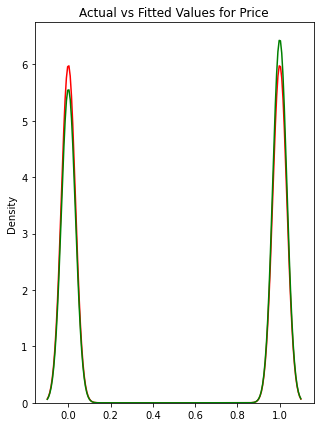

In [ ]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="g", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')


plt.show()
plt.close()

From above graph we can see that there is not much difference between the predicted and correct value.
Therefore, logistic regression is a suitable model for classifying



*   Variables were selected based on their dependence and independence on one-another. ANOVA or Chi-square test can be used for this purpose.
*   The most useful variables are used in prediction of the dependent variable in dataset.


*   Variables are of two types dependent and independent. The categorical variables are dropped off if not needed.


*   In this dataset variables such as nameDest, nameOrg, isfraudFlagged were dropped as they were not useful for the prediction.
*   The reason they were termed as unuseful was they did not affect other variables in any manner. Hence thier presence or abscence did not make any changes to the data.


*   Dependent variables are known as target variables and independent ones are known as feature variables.








# Factors predicting fraudulent customers 



*  The difference between original transaction and new transaction should be same as balance reflected in newbalanceDest.
*  The isFraud data value is uniform throughout day while transactions occurred are not.

*  Ratio of fraud compared to non-frauds is very low which is a case of consideration.
*  The time step of the day also playes a key role in determining fraud by drawing a comaprison between the step and transaction time occurred.





# Preventions to be adopted by company 



*   The company should deploy a fingerprint or password system to validate transactions.


*   Machine learning models should be deployed to note the apttern of customer behaviour in terms of account activity.
*   Also, hyperparameter tuning and cross-validation should be done to make system fraud-proof.


*   UserID should be linked with the bank account and the customer should be notified in case of any happenings witht he account.



*   The step between deposit and cash-out should be maintained and highlighted if the time period between deposit and cash-out is short.





# Proof-checking of implemented actions



*   There should be regular monitoring of the infrastructure adopted by the company.
*   Account transaction details should be sent to users on a regular period to the company. 


*   There should be a threshold value set for each account-holder and any transaction above that should be nullified.
*   Transaction IDs should be identified with those of the actual issued ones.


*   No two transaction IDs should match
*   Any activity related to account takeover should be recorded and user authentication should be done.






